In [1]:
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from scipy.stats import spearmanr
import numpy as np
from keras.models import load_model
import config
import mdm_utils

2024-04-04 11:45:23.782549: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 AVX512F AVX512_VNNI FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2024-04-04 11:45:24.417151: I tensorflow/core/util/port.cc:104] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2024-04-04 11:45:24.453900: W tensorflow/compiler/xla/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory
2024-04-04 11:45:24.453958: I tensorflow/compiler/xla/stream_executor/cuda/cudart_stub.cc:29] Ignore 

In [2]:
# load the model
model = load_model(config.best_model)

2024-04-04 11:45:27.260953: E tensorflow/compiler/xla/stream_executor/cuda/cuda_driver.cc:267] failed call to cuInit: CUDA_ERROR_NO_DEVICE: no CUDA-capable device is detected
2024-04-04 11:45:27.261012: I tensorflow/compiler/xla/stream_executor/cuda/cuda_diagnostics.cc:156] kernel driver does not appear to be running on this host (LAPTOP-FFBHGIO8): /proc/driver/nvidia/version does not exist
2024-04-04 11:45:27.261386: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 AVX512F AVX512_VNNI FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [3]:
#  load data
x_train = np.loadtxt("./input/x_train.txt")
x_val = np.loadtxt("./input/x_val.txt")
x_test = np.loadtxt("./input/x_test.txt")

y_train = np.loadtxt("./input/y_train.txt")
y_val = np.loadtxt("./input/y_val.txt")
y_test = np.loadtxt("./input/y_test.txt")

train results
311/311 [==============================] - 1s 3ms/step
r2: 0.9066
sp: 0.9496
rmse: 0.6744
mae: 0.4560


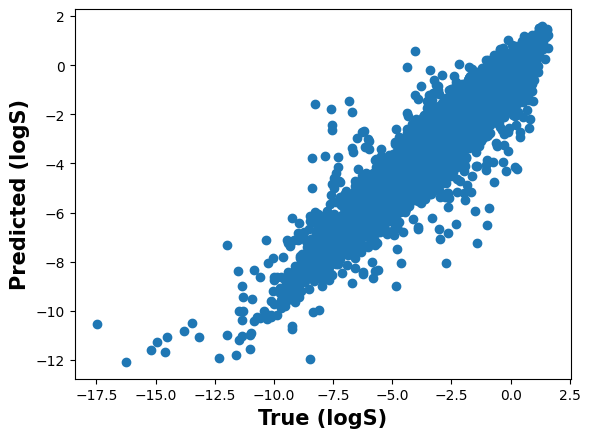

val results
28/28 [==============================] - 0s 3ms/step
r2: 0.8435
sp: 0.9207
rmse: 0.8610
mae: 0.5929


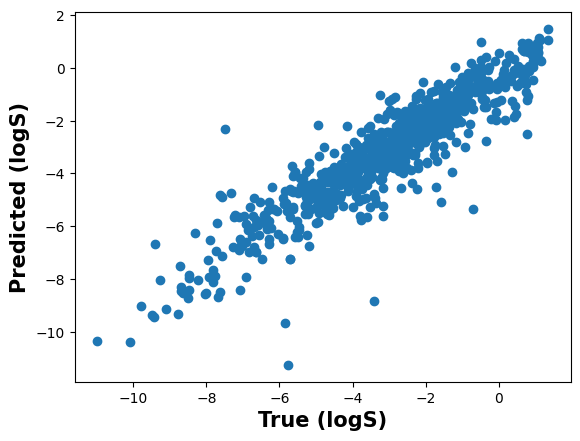

test results
28/28 [==============================] - 0s 3ms/step
r2: 0.8208
sp: 0.9034
rmse: 0.9157
mae: 0.6138


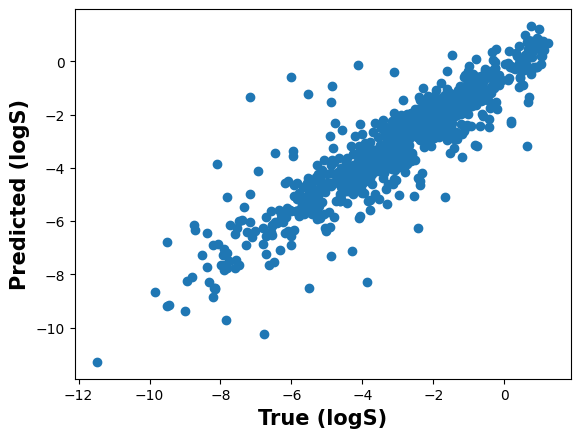

In [4]:
# make predictions
mdm_utils.get_results(db_name='train', X=x_train, y=y_train, model=model)
mdm_utils.get_results(db_name='val', X=x_val, y=y_val, model=model)
mdm_utils.get_results(db_name='test', X=x_test, y=y_test, model=model)

In [5]:
pred = model.predict(x_test).ravel()


28/28 [==============================] - 0s 3ms/step


In [6]:
pred

array([ -3.4456205 ,  -2.519116  ,  -3.6507008 ,  -6.4331074 ,
        -0.4615272 ,  -2.2040405 ,  -4.646826  ,  -1.691822  ,
        -3.919744  ,   0.38274598,  -1.9458531 ,  -1.4883441 ,
        -1.2635146 ,  -5.052066  ,  -0.37759715,  -3.6391892 ,
        -2.4555976 ,  -7.644537  ,  -7.1838264 ,  -0.22331035,
        -0.9077724 ,  -2.5505621 ,  -0.05555892,  -4.440325  ,
        -4.6051874 ,  -4.085725  ,  -6.5533895 ,  -2.5275617 ,
        -5.4178114 ,  -1.6229544 ,  -3.4133766 ,  -1.8102101 ,
        -1.1882792 ,  -2.6625998 ,  -6.3684464 ,  -3.364076  ,
        -1.243624  ,  -3.6251366 ,  -7.631546  ,  -0.68223894,
        -1.3543591 ,  -2.0671325 ,  -4.1619635 ,   0.78698206,
        -2.676894  ,  -3.8605819 ,  -1.8190795 ,  -3.4732592 ,
        -0.34271574,  -2.3655066 ,  -3.9634736 ,  -6.55441   ,
        -5.6167173 ,  -2.2715836 ,  -2.4406629 ,  -4.486148  ,
        -3.6197112 ,  -3.9563124 ,  -7.271806  ,  -2.6281881 ,
        -3.1674035 ,  -9.725824  ,  -1.5235653 ,  -1.06

In [7]:
print(x_test.shape)

(878, 1136)
